In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
train = pd.read_csv('train.csv')
data = pd.read_csv('bids.csv')
test = pd.read_csv('test.csv')

### Number of actions by bidder

In [8]:
dataIdList =  data['bidder_id'].unique()
groupedData = data[['bidder_id','auction']].groupby('bidder_id').count()['auction']
#group by returns series not a dataframe
def numberofActions(line,dataGrouped,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return dataGrouped[line['bidder_id']]
    
train['nbActions'] = train.apply(lambda x: numberofActions(x,groupedData,dataIdList),axis=1)
test['nbActions'] = test.apply(lambda x: numberofActions(x,groupedData,dataIdList),axis=1)


##--A diff approach but same result--##
#groupedData = data[['bidder_id','auction']].groupby('bidder_id',as_index=False).agg({'auction':'count'})
##when group by returns a dataframe use this approach, but when it returns a series use the first approach
#train = pd.merge(train, groupedData, how = 'left', on = 'bidder_id')
#train.loc[train['auction'].isna() ,'auction'] = 0

### Bid Value
*number of bids before the action of the user on an auction*
 - mean bid value
 - min bid value
 - max bid value

In [9]:
lastActionDict={}

def bidValue(line,lastActionDict):
    if line['auction'] in lastActionDict:
        lastActionDict[line['auction']] += 1
    else :
        lastActionDict[line['auction']] = 1
    return lastActionDict[line['auction']]

data['bidValue'] = data.apply(lambda x: bidValue(x,lastActionDict),axis=1)

In [10]:
data.sort_values(by = ['auction', 'bid_id']) # to check who did the max bid in the auction

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,bidValue
5826422,5826422,92af1e40713e077ef87f5352fb56772fjnzm7,00270,mobile,phone563,9699049894736842,us,78.188.245.105,vuaaeraf3dqz299,1
5834284,5834284,a939f51234ad2c44eb9ccc84e754f41foiv7g,00270,mobile,phone63,9699098210526315,us,12.142.135.122,fbpq1mgtpgnkqnk,2
5850448,5850448,92af1e40713e077ef87f5352fb56772fjnzm7,00270,mobile,phone735,9699195789473684,us,2.86.254.154,nn2g552xadgkfch,3
5884054,5884054,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,sporting goods,phone573,9699392473684210,us,149.152.163.145,vasstdc27m7nks3,4
5898318,5898318,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,sporting goods,phone2294,9699474473684210,us,219.254.45.139,vasstdc27m7nks3,5
5910348,5910348,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,sporting goods,phone1830,9699542947368421,us,101.253.21.88,vasstdc27m7nks3,6
5911709,5911709,84c4b58a1491da3a30710bcdf61f87054xfq6,00270,mobile,phone2,9699550684210526,us,247.124.231.180,qi80ms9ikpku6g3,7
5915604,5915604,92af1e40713e077ef87f5352fb56772fjnzm7,00270,mobile,phone5,9699571842105263,us,75.6.24.90,tab0g291xc3swpq,8
5921974,5921974,9a81137ad31d7253759cdb9ae8e44227fw8x9,00270,mobile,phone2604,9699605526315789,us,48.151.205.183,34nt1gihlsuwugy,9
5925427,5925427,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,sporting goods,phone385,9699623421052631,us,56.42.39.217,vasstdc27m7nks3,10


In [11]:
GroupedData = data[['bidder_id','bidValue']].groupby('bidder_id').mean()['bidValue']

def bidmean(line, GroupedData, dataIdList):
    if not line['bidder_id'] in dataIdList:
        return 0
    else:
        return GroupedData[line['bidder_id']]
    
train['bidmean'] = train.apply(lambda x: bidmean(x,GroupedData,dataIdList), axis = 1)
test['bidmean'] = test.apply(lambda x: bidmean(x,GroupedData,dataIdList), axis = 1)

##-----------------------------------------------------------------------------------------##

GroupedData = data[['bidder_id','bidValue']].groupby('bidder_id').min()['bidValue']

def bidmin(line, GroupedData, dataIdList):
    if not line['bidder_id'] in dataIdList:
        return 0
    else:
        return GroupedData[line['bidder_id']]
    
train['bidmin'] = train.apply(lambda x: bidmin(x,GroupedData,dataIdList), axis = 1)
test['bidmin'] = test.apply(lambda x: bidmin(x,GroupedData,dataIdList), axis = 1)


##-----------------------------------------------------------------------------------------##

GroupedData = data[['bidder_id','bidValue']].groupby('bidder_id').max()['bidValue']

def bidmax(line, GroupedData, dataIdList):
    if not line['bidder_id'] in dataIdList:
        return 0
    else:
        return GroupedData[line['bidder_id']]
    
train['bidmax'] = train.apply(lambda x: bidmax(x,GroupedData,dataIdList), axis = 1)
test['bidmax'] = test.apply(lambda x: bidmax(x,GroupedData,dataIdList), axis = 1)

### Auction played and won
*estimation of the winner by the last action and finding the number of auction played by users*
- number of auctions played
- number of auctions won

In [12]:
unique_auctions_bidder =  data[['bidder_id','auction']].drop_duplicates()
groupedData = unique_auctions_bidder[['bidder_id','auction']].groupby('bidder_id').count()['auction']
#group by returns series not a dataframe
def numberofActions(line,groupedData,dataid):
    if not line['bidder_id'] in dataid:
        return 0
    else:
        return groupedData[line['bidder_id']]
    
train['nb_auctionsplayed'] = train.apply(lambda x: numberofActions(x,groupedData,dataIdList),axis=1)
test['nb_auctionsplayed'] = test.apply(lambda x: numberofActions(x,groupedData,dataIdList),axis=1)

In [13]:
def last(line,lastActionDict):
    if line['bidValue'] == lastActionDict[line['auction']] :
        return True
    else :
        return False

data['end'] = data.apply(lambda x: last(x,lastActionDict),axis=1)

In [14]:
data = data.loc[data['end'] == True,:]

In [15]:
groupeddata = data[['end','bidder_id']].groupby('bidder_id').count()['end']
def auctionswon(line,groupeddata):
    if not line['bidder_id'] in groupeddata:
        return 0
    else:
        return groupeddata[line['bidder_id']]


train['nb_auctionswon'] = train.apply(lambda x: auctionswon(x,groupeddata ), axis = 1)
test['nb_auctionswon'] = test.apply(lambda x: auctionswon(x,groupeddata ), axis = 1)

In [16]:
data.head(5)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,bidValue,end
1458,1458,ef40c29a478ca16687a76bc405097bbagamph,ik9pz,jewelry,phone8,9759251526315789,th,86.200.121.249,g7yg5ozmp5i1rr8,1,True
1469,1469,46a28eaed47c29b4fd148a50cde44840u0bsn,5j1ao,mobile,phone56,9759251631578947,th,35.114.198.242,vasstdc27m7nks3,1,True
1510,1510,8b43632b2ac250c4dad3568efa29d22ai6egs,za22o,jewelry,phone57,9759251842105263,za,253.29.216.198,9vpaxit2i560e7d,2,True
1729,1729,54e279a4e162af7fc55d640aa62d0cbc9hxil,bgguv,mobile,phone59,9759253000000000,za,94.37.134.136,vasstdc27m7nks3,1,True
1931,1931,e7a98dc8545eb429007cb48799a40a2dc9p6o,jbucw,mobile,phone6,9759254052631578,th,179.127.203.191,vasstdc27m7nks3,1,True


### IP
*Number of unique IP used by user*

In [17]:
groupeddata = data[['bidder_id','ip']].drop_duplicates().groupby('bidder_id',as_index=False).agg({'ip':'count'})
groupeddata

train = pd.merge(train, groupeddata, how = 'left', on = 'bidder_id')
train.loc[train['ip'].isna() ,'ip'] = 0
train.ip = train.ip.astype('int32')

### URL
*Number of unique URL used by user*

In [18]:
groupeddata = data[['bidder_id','url']].drop_duplicates().groupby('bidder_id',as_index=False).agg({'url':'count'})

train = pd.merge(train, groupeddata, how = 'left', on = 'bidder_id')
train.loc[train['url'].isna() ,'url'] = 0
train.url = train.url.astype('int32')

### Device
*Number of unique device used by user*

In [19]:
groupeddata = data[['bidder_id','device']].drop_duplicates().groupby('bidder_id',as_index=False).agg({'device':'count'})
groupeddata

train = pd.merge(train, groupeddata, how = 'left', on = 'bidder_id')
train.loc[train['device'].isna() ,'device'] = 0
train.device = train.device.astype('int32')

### Country
*Number of unique country used by user*

In [20]:
groupeddata = data[['bidder_id','country']].drop_duplicates().groupby('bidder_id',as_index=False).agg({'country':'count'})
groupeddata

train = pd.merge(train, groupeddata, how = 'left', on = 'bidder_id')
train.loc[train['country'].isna() ,'country'] = 0
train.country = train.country.astype('int32')

In [21]:
train.rename(columns={'ip':'nb_unique_ips',
                          'url':'nb_unique_url',
                          'device':'nb_unique_device',
                          'country':'nb_unique_country'   }, 
                 inplace=True)

### Merchandise 
*One Hot Encoding*

In [ ]:
grouped = data[['bidder_id','merchandise']].drop_duplicates()

train = pd.merge(train, grouped, how = 'left', on = 'bidder_id')
train.loc[train['merchandise'].isna() ,'merchandise'] = 'Other'

one_hot = pd.get_dummies(train['merchandise'], prefix = 'merchandise')
train = pd.concat([train, one_hot], axis = 1)
train.drop(['merchandise_Other', 'merchandise'], axis = 1 , inplace=True)

In [55]:
train.outcome = train.outcome.astype('int32') # Change data type

In [ ]:
from sklearn.ensemble import RandomForestClassifier


train_r = train

X_train = train_r.drop(['bidder_id','outcome','payment_account','address'],axis=1)
y_train = train_r['outcome']

from sklearn.cross_validation import cross_val_score

rand = RandomForestClassifier(n_estimators=600,max_depth=15,min_samples_leaf=2)


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
train_r = train
X = train_r.drop(['bidder_id','outcome','payment_account','address'],axis=1)
y = train_r['outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=44)

clf = RandomForestClassifier(n_estimators=600,max_depth=15,min_samples_leaf=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

##---------Cross Validation-----------------------##
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

print("Accuracy_Cross_Validation",cross_val_score(rand,X_train,y_train,cv=5).mean())

Accuracy 0.9594594594594594
Accuracy_Cross_Validation 0.9437033785455575


### AUC Curve

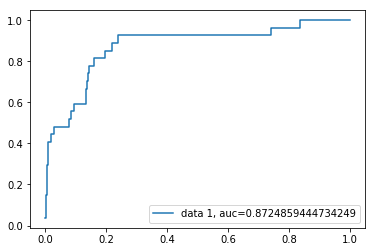

In [87]:
y_pred_proba = clf.predict_proba(X_test)[::,1]##Using [:,1] in the code will give you the probabilities of getting the output as 1. If you replace 1 with 0 in the above code, you will only get the probabilities of getting the output as 0.

## Predict will give either 0 or 1 as output
#Predict_proba will give the  probability of 0 or 1
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### ROC Curve

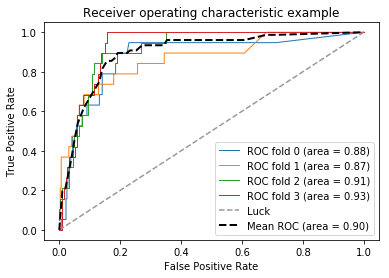

In [88]:
# Run classifier with cross-validation and plot ROC curves
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp
X=np.array(X_train)
y=np.array(y_train)
cv = StratifiedKFold(y, n_folds=4)
classifier = RandomForestClassifier(n_estimators=2000,max_depth=20,min_samples_leaf=1)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (tran, tet) in enumerate(cv):
    probas_ = classifier.fit(X[tran], y[tran]).predict_proba(X[tet])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[tet], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()